In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('house price dataset.csv')

# Selecting the features and target
X = data[['LotArea']]  # Independent variable
y = data['SalePrice']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (very important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Creating a SVR model
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Fitting the model
model.fit(X_train_scaled, y_train_scaled)

# Making predictions
y_pred_scaled = model.predict(X_test_scaled)

# Transforming predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean squared error: {mse:.2f}")
print(f"R^2 score: {r2:.2f}")

Saving house price dataset.csv to house price dataset.csv
Mean squared error: 6778476236.97
R^2 score: 0.12


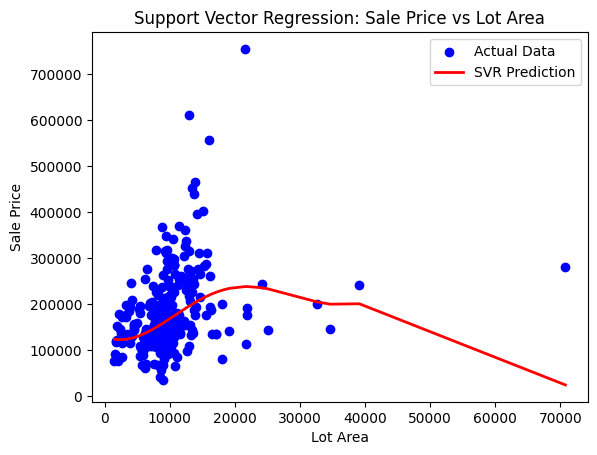

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting the test data and predictions for better visualization
sorted_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values.flatten()[sorted_indices]
y_test_sorted = y_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plotting the test data
plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='SVR Prediction')

# Adding labels and title
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Support Vector Regression: Sale Price vs Lot Area')

# Adding a legend
plt.legend()

# Display the plot
plt.show()
